In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df = pd.read_csv('../0107_FinalData/all_clear_rate_final.csv')
#filter = df['Label']=='boss' 
#filter = df['Label']=='politician' 
#filter = df['Label']=='doctor'
#filter = df['Label']=='entertainer' 
#filter = df['Label']=='sport'
filter = df['Label']=='ordinary_people'

# filter1 = df['Label']==('model')  
# filter2 = df['Label']==('singer')
# filter3 = df['Label']==('actor')
# data_m= df[filter1]
# data_s= df[filter2]
# data_a= df[filter3]
# data_f=  pd.concat([data_m,data_s,data_a],axis=0)


data_f = df[filter]
# data_i = df[filter].iloc[:,:4]
data_f

,Name,Sex,Country,Label,Eye_R_S_W,Eye_R_B_W,Eye_L_S_W,Eye_L_B_W,Eye_R_H1_W,Eye_R_H2_W,...,face_R_widthS_L,face_L_width_L,face_L_widthS_L,Eye_to_eyebrow_L_L,eye_to_eyebrow_R_L,Nosehead_L,Forehead_w_L,nose_area,eye_R_area,eye_L_area
22282,272659-0_output.png,0,0,ordinary_people,0.181186,0.212531,0.205239,0.244209,0.020011,0.048793,...,0.017891,0.513658,0.017606,0.061755,0.056867,0.082506,0.784835,0.158525,0.011965,0.012876
22283,272827-0_output.png,0,1,ordinary_people,0.238626,0.276202,0.214725,0.241033,0.017584,0.047772,...,0.040279,0.396510,0.044642,0.057054,0.051422,0.104309,0.871306,0.142577,0.019075,0.018166
22284,272828-0_output.png,0,1,ordinary_people,0.238913,0.275501,0.216234,0.245350,0.017311,0.047203,...,0.045904,0.448298,0.048673,0.052019,0.057023,0.107894,0.914309,0.150085,0.019374,0.016913
22285,273055-0_output.png,0,1,ordinary_people,0.185303,0.215196,0.217850,0.253184,0.017950,0.045178,...,0.019720,0.495437,0.016162,0.057947,0.055862,0.088646,0.800096,0.166876,0.011869,0.015186
22286,273244-0_output.png,0,0,ordinary_people,0.235772,0.278267,0.205821,0.238216,0.019979,0.050647,...,0.055505,0.385238,0.057592,0.090481,0.081984,0.093540,0.838809,0.143574,0.017184,0.015536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122241,858923-2_output.png,1,1,ordinary_people,0.202775,0.239668,0.185879,0.222882,0.010995,0.025083,...,0.004510,0.428665,0.002550,0.069108,0.072768,0.082851,0.817859,0.146071,0.006908,0.008329
122242,858923-3_output.png,1,0,ordinary_people,0.193597,0.229435,0.187856,0.219271,0.014831,0.037405,...,0.009856,0.409412,0.005604,0.047356,0.057411,0.085924,0.795641,0.142305,0.010460,0.009892
122243,858923-4_output.png,1,0,ordinary_people,0.199389,0.235810,0.178753,0.215989,0.016639,0.038438,...,0.007012,0.407675,0.006054,0.054170,0.059359,0.081490,0.761563,0.145191,0.010024,0.006364
122244,858975-0_output.png,1,0,ordinary_people,0.176491,0.211038,0.205465,0.250265,0.010599,0.022555,...,0.041762,0.519365,0.029143,0.060719,0.065759,0.089279,0.774073,0.156494,0.004787,0.007837


In [4]:
feature_cols = data_f.columns[4:]
feature_cols

Index(['Eye_R_S_W', 'Eye_R_B_W', 'Eye_L_S_W', 'Eye_L_B_W', 'Eye_R_H1_W',
       'Eye_R_H2_W', 'Eye_R_H3_W', 'Eye_R_H4_W', 'Eye_R_H5_W', 'Eye_R_H6_W',
       ...
       'face_R_widthS_L', 'face_L_width_L', 'face_L_widthS_L',
       'Eye_to_eyebrow_L_L', 'eye_to_eyebrow_R_L', 'Nosehead_L',
       'Forehead_w_L', 'nose_area', 'eye_R_area', 'eye_L_area'],
      dtype='object', length=145)

In [5]:
data_f.dtypes

Name             object
Sex               int64
Country           int64
Label            object
Eye_R_S_W       float64
                 ...   
Nosehead_L      float64
Forehead_w_L    float64
nose_area       float64
eye_R_area      float64
eye_L_area      float64
Length: 149, dtype: object

In [42]:
# detect outlier: IQR method
def outlier_detect_IQR(data,col,threshold=3): # threshold : 幾倍標準差
    '''
    outlier detection by Interquartile Ranges Rule, also known as Tukey's test. 
    calculate the IQR ( 75th quantile - 25th quantile) 
    and the 25th 75th quantile. 
    Any value beyond:
        upper bound = 75th quantile + （IQR * threshold）
        lower bound = 25th quantile - （IQR * threshold）   
    are regarded as outliers. Default threshold is 3.
    '''
     #設定IQR
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
    para = (Upper_fence, Lower_fence)
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

In [43]:
#drop outlinear
for i in feature_cols:
    try:
        index,para = outlier_detect_IQR(data = data_f,col=i,threshold=1.5) 
        #print('Upper bound:',para[0],'\nLower bound:',para[1])
        print(index)
        data_f = data_f[~index]
    except:continue
data_f       

Num of outlier detected: 2413
Proportion of outlier detected 0.024138689928374216
22282     False
22283      True
22284      True
22285     False
22286      True
          ...  
122241    False
122242    False
122243    False
122244    False
122245    False
Length: 99964, dtype: bool
Num of outlier detected: 555
Proportion of outlier detected 0.005689331734169819
22282     False
22285     False
22287     False
22288     False
22289     False
          ...  
122241    False
122242    False
122243    False
122244    False
122245    False
Length: 97551, dtype: bool
Num of outlier detected: 2175
Proportion of outlier detected 0.022423605097117407
22282     False
22285     False
22287     False
22288     False
22289      True
          ...  
122241    False
122242    False
122243    False
122244    False
122245    False
Length: 96996, dtype: bool
Num of outlier detected: 382
Proportion of outlier detected 0.004028643443962835
22282     False
22285     False
22287     False
22288     False
2

Num of outlier detected: 158
Proportion of outlier detected 0.001848883063997098
22282     False
22285     False
22287     False
22288     False
22292     False
          ...  
122239    False
122240    False
122241    False
122242    False
122243    False
Length: 85457, dtype: bool
Num of outlier detected: 995
Proportion of outlier detected 0.011664849529302806
22282     False
22285     False
22287     False
22288     False
22292     False
          ...  
122239    False
122240    False
122241    False
122242    False
122243    False
Length: 85299, dtype: bool
Num of outlier detected: 465
Proportion of outlier detected 0.005515752514708674
22282     False
22285     False
22287     False
22288     False
22292     False
          ...  
122239    False
122240    False
122241    False
122242    False
122243    False
Length: 84304, dtype: bool
Num of outlier detected: 459
Proportion of outlier detected 0.005474779040780544
22282     False
22285     False
22287     False
22288     False
222

Num of outlier detected: 401
Proportion of outlier detected 0.00555094130675526
22285     False
22287     False
22292     False
22299     False
22300     False
          ...  
122239    False
122240    False
122241    False
122242    False
122243    False
Length: 72240, dtype: bool
Num of outlier detected: 251
Proportion of outlier detected 0.0034939239131947827
22285     False
22287     False
22292     False
22299     False
22300     False
          ...  
122239    False
122240    False
122241    False
122242    False
122243    False
Length: 71839, dtype: bool
Num of outlier detected: 263
Proportion of outlier detected 0.003673800078225401
22285     False
22287     False
22292     False
22299     False
22300     False
          ...  
122239    False
122240    False
122241    False
122242    False
122243    False
Length: 71588, dtype: bool
Num of outlier detected: 82
Proportion of outlier detected 0.0011496670171749037
22285     False
22287     False
22292     False
22299     False
223

Num of outlier detected: 119
Proportion of outlier detected 0.0018613818022555568
22285     False
22287     False
22292     False
22300     False
22305     False
          ...  
122239    False
122240    False
122241    False
122242    False
122243    False
Length: 63931, dtype: bool
Num of outlier detected: 326
Proportion of outlier detected 0.005108756973609979
22285     False
22287     False
22292     False
22300     False
22305     False
          ...  
122239    False
122240    False
122241    False
122242    False
122243    False
Length: 63812, dtype: bool
Num of outlier detected: 343
Proportion of outlier detected 0.0054027659641495765
22285     False
22287     False
22292     False
22300     False
22305     False
          ...  
122239    False
122240    False
122241    False
122242    False
122243    False
Length: 63486, dtype: bool
Num of outlier detected: 166
Proportion of outlier detected 0.002628953328159891
22285     False
22287     False
22292     False
22300     False
2

Num of outlier detected: 21
Proportion of outlier detected 0.0003593675131768088
22285     False
22287     False
22292     False
22300     False
22305     False
          ...  
122239    False
122240    False
122241    False
122242    False
122243    False
Length: 58436, dtype: bool
Num of outlier detected: 124
Proportion of outlier detected 0.0021227424462894806
22285     False
22287     False
22292     False
22300     False
22305     False
          ...  
122239    False
122240    False
122241    False
122242    False
122243    False
Length: 58415, dtype: bool
Num of outlier detected: 76
Proportion of outlier detected 0.0013038033315606182
22285     False
22287     False
22292     False
22300     False
22305     False
          ...  
122239    False
122240    False
122241    False
122242    False
122243    False
Length: 58291, dtype: bool
Num of outlier detected: 57
Proportion of outlier detected 0.0009791290904406082
22285     False
22287     False
22292     False
22300     False
22

,Name,Sex,Country,Label,Eye_R_S_W,Eye_R_B_W,Eye_L_S_W,Eye_L_B_W,Eye_R_H1_W,Eye_R_H2_W,...,face_R_widthS_L,face_L_width_L,face_L_widthS_L,Eye_to_eyebrow_L_L,eye_to_eyebrow_R_L,Nosehead_L,Forehead_w_L,nose_area,eye_R_area,eye_L_area
22285,273055-0_output.png,0,1,ordinary_people,0.185303,0.215196,0.217850,0.253184,0.017950,0.045178,...,0.019720,0.495437,0.016162,0.057947,0.055862,0.088646,0.800096,0.166876,0.011869,0.015186
22287,273247-0_output.png,0,0,ordinary_people,0.181641,0.220314,0.185593,0.220689,0.016955,0.042338,...,0.011789,0.448026,0.011622,0.071306,0.061580,0.097091,0.850814,0.159269,0.011052,0.011686
22292,273392-0_output.png,0,1,ordinary_people,0.223090,0.260966,0.207075,0.236607,0.017511,0.044469,...,0.029009,0.396436,0.027909,0.052504,0.072356,0.093865,0.834726,0.154299,0.013978,0.015769
22300,273490-1_output.png,0,0,ordinary_people,0.179780,0.209882,0.204895,0.242653,0.014749,0.037322,...,0.028305,0.542720,0.020972,0.067026,0.059544,0.095180,0.850770,0.170382,0.010138,0.011861
22305,273625-0_output.png,0,1,ordinary_people,0.200898,0.239136,0.175336,0.206414,0.017935,0.043340,...,0.015670,0.363257,0.017499,0.064612,0.061231,0.096158,0.823288,0.137780,0.012258,0.008897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122239,858920-1_output.png,1,0,ordinary_people,0.185734,0.221812,0.195829,0.236855,0.011020,0.024126,...,0.013585,0.497862,0.017080,0.061558,0.073744,0.089277,0.811321,0.161229,0.006058,0.005889
122240,858923-0_output.png,1,0,ordinary_people,0.183599,0.217835,0.181860,0.224949,0.010849,0.023758,...,0.015636,0.475221,0.014504,0.054440,0.061145,0.085345,0.760880,0.161232,0.005741,0.005919
122241,858923-2_output.png,1,1,ordinary_people,0.202775,0.239668,0.185879,0.222882,0.010995,0.025083,...,0.004510,0.428665,0.002550,0.069108,0.072768,0.082851,0.817859,0.146071,0.006908,0.008329
122242,858923-3_output.png,1,0,ordinary_people,0.193597,0.229435,0.187856,0.219271,0.014831,0.037405,...,0.009856,0.409412,0.005604,0.047356,0.057411,0.085924,0.795641,0.142305,0.010460,0.009892


In [ ]:
# # 補中位數
# # handle outlier: impute with mean 
# def impute_outlier_with_avg(data,col,outlier_index,strategy='median'):
#     """
#     impute outlier with mean/median/most frequent values of that variable.
#     """
    
#     data_copy = data.copy(deep=True)
#     if strategy=='mean':
#         data_copy.loc[outlier_index,col] = data_copy[col].mean()
#     elif strategy=='median':
#         data_copy.loc[outlier_index,col] = data_copy[col].median()
#     elif strategy=='mode':
#         data_copy.loc[outlier_index,col] = data_copy[col].mode()[0]   
        
#     return data_copy

In [ ]:
# # use any of the detection method above
# # index,para = outlier_detect_arbitrary(data=data_f,'Fare',300,5)
# # print('Upper bound:',para[0],'\nLower bound:',para[1])
# # see index 258,263,271 have been replaced with mean
# for i in feature_cols:
#     try:
#         index,para = outlier_detect_IQR(data = data_f,col=i,threshold=1.5) 
#         data_f = impute_outlier_with_avg(data=data_f,col=i,
#                                    outlier_index=index,strategy='median') # 填median
#     except:continue
# data_f

<AxesSubplot:>

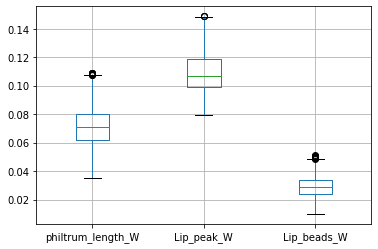

In [34]:
#for i in feature_cols :
data_f.iloc[:,45:48].boxplot() 

In [44]:
#data= pd.concat([data_f,data_i],axis=0)
data_f.to_csv('outlier_drop_ordinary.csv',index=False) 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df1 = pd.read_csv('./outlier_drop_boss.csv')
df2 = pd.read_csv('./outlier_drop_doctor.csv')
df3 = pd.read_csv('./outlier_drop_entertainer.csv')
df4 = pd.read_csv('./outlier_drop_politician.csv')
df5 = pd.read_csv('./outlier_drop_ordinary.csv')
df6 = pd.read_csv('./outlier_drop_sport.csv')
df=  pd.concat([df1,df2,df3,df4,df5,df6],axis=0)

df.to_csv('All_clean_IQR.csv',index=False) 

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# df1 = pd.read_csv('./outlier_median_boss.csv')
# df2 = pd.read_csv('./outlier_median_doctor.csv')
# df3 = pd.read_csv('./outlier_median_entertainer.csv')
# df4 = pd.read_csv('./outlier_median_politician.csv')
# df5 = pd.read_csv('./outlier_median_ordinary.csv')
# df6 = pd.read_csv('./outlier_median_sport.csv')
# df=  pd.concat([df1,df2,df3,df4,df5,df6],axis=0)

# df.to_csv('All_median_IQR.csv',index=False) 